### Explore Attributes and Class

_Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification)._


In [102]:
#import the data
import pandas as pd
df = pd.read_csv('C:/Users/bsnxw01/Desktop/MSDS_Program/MSDS_7331/Project/Lab1/DataMiningGroupProjects/Project1/Input/DefaultCreditcardClients.csv')
df.rename(columns={'default payment next month':'default'}, inplace=True)
df.dtypes


ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [103]:
import numpy as np

# Change numeric values to floats
continuous_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
                       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                       'PAY_AMT6']
#ordinal_features = ['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
#categ_features = ['ID', 'SEX', 'default'];
df[continuous_features] = df[continuous_features].astype(np.float64)

#convert any non-identified education categories to 'OTHER'
df['EDUCATION'] = df['EDUCATION'].replace(to_replace=(0,5,6),value=4)

#convert any non-identified marriage categories to 'OTHER'
df['MARRIAGE'] = df['MARRIAGE'].replace(to_replace=(0),value=3)

df['LastPayment'] = pd.cut(df.PAY_AMT6,[-3,0,8],2,labels=['on-time','delinquent']) # this creates a new variable

df['BalanceProp'] = df['BILL_AMT6']/df['LIMIT_BAL']

#transform continuous variables as they each have a mostly exponential distribution
df[continuous_features] = df[continuous_features].replace(to_replace=0,value=np.nan).apply(np.log)

#df[ordinal_features] = df[ordinal_features].astype(np.int64)


### Explore Attributes and Class

_Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification)._

In order to understand the potential model we would use and how we may want to select certain features or potentially identify new features for us in our model we took a look at how each of the variables relate to our default categories (1/0).


In [56]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

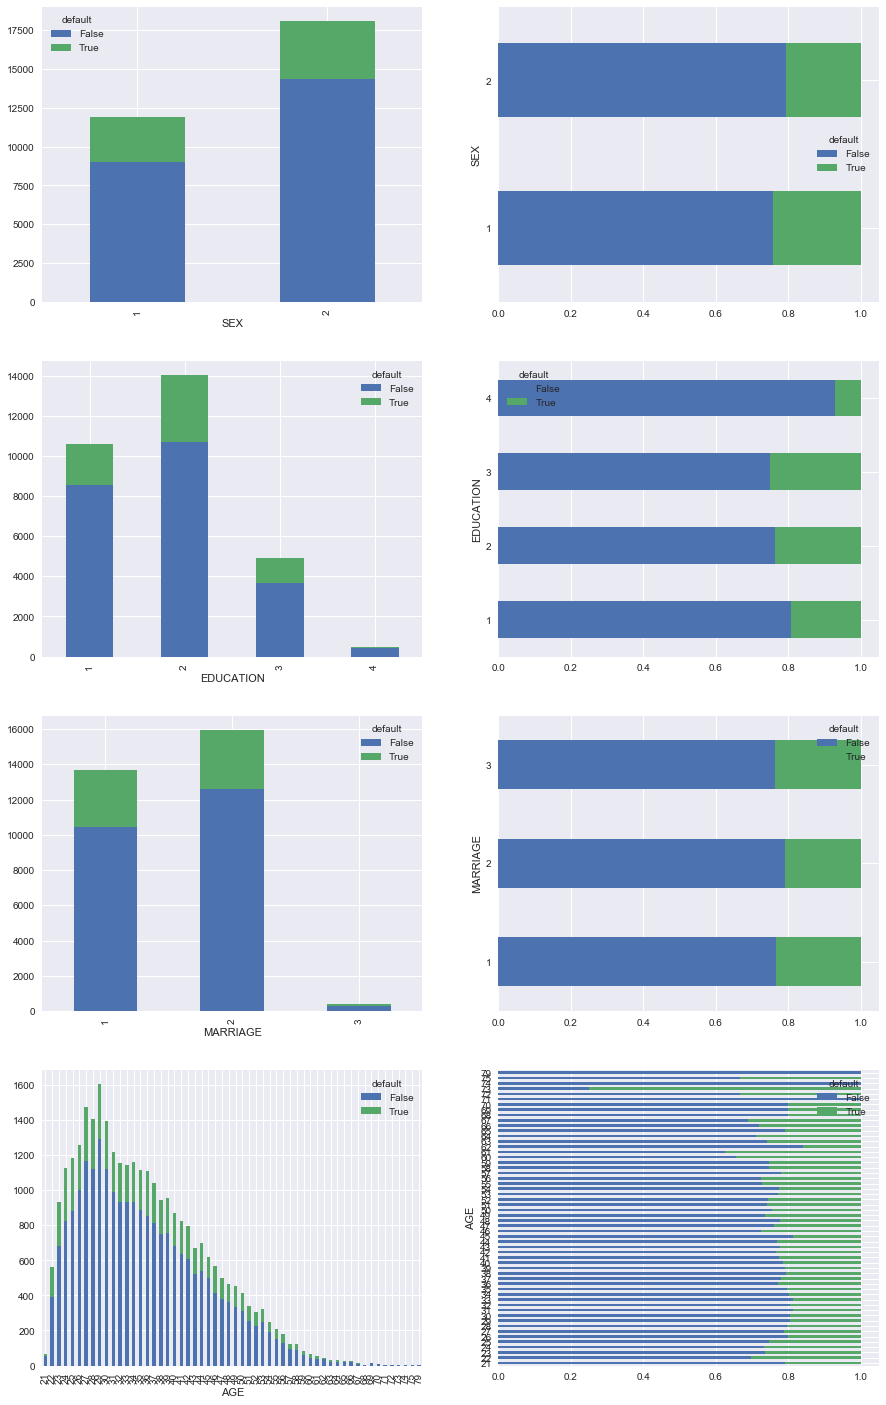

In [73]:
# cross tabs provide a quick view of the relationships between different categorical variable & our target
# beginning with the characteristics of the borrower

plotVar = ['SEX','EDUCATION','MARRIAGE','AGE']

fig, axes = plt.subplots(nrows=len(plotVar), ncols=2, figsize=(15, 25))

for fi,feature in enumerate(plotVar):
    Counts = pd.crosstab(df[feature],df.default.astype(bool))
    Counts.plot(kind='bar', stacked=True, ax=axes[fi,0])
    
    Rate = Counts.div(Counts.sum(1).astype(float),axis=0)
    Rate.plot(kind='barh', stacked=True, ax=axes[fi,1])
    
plt.show()


After reviewing the features from above there are a couple relationships that stand out when comparing the demographic features and the proportion of defaults for our sample. 

Sex
- There does appear to be a noticeable difference in the default rates by gender based on a visual inspection.

Education
- There does seem to pattern between the amount of education people receive and the default rates. Based on the visual inspection of the above data there is some indication that people with higher levels of education default at lower rates.

Marriage
- There does not seem to be any obvious discernable trends based on Marital Status

Age:
- Based on the age variables there is potentially some indications that people in there early 20's are more succeptible to defaulting, however this variable may need to be bucketed differently to better interpret the succeptible age groups.


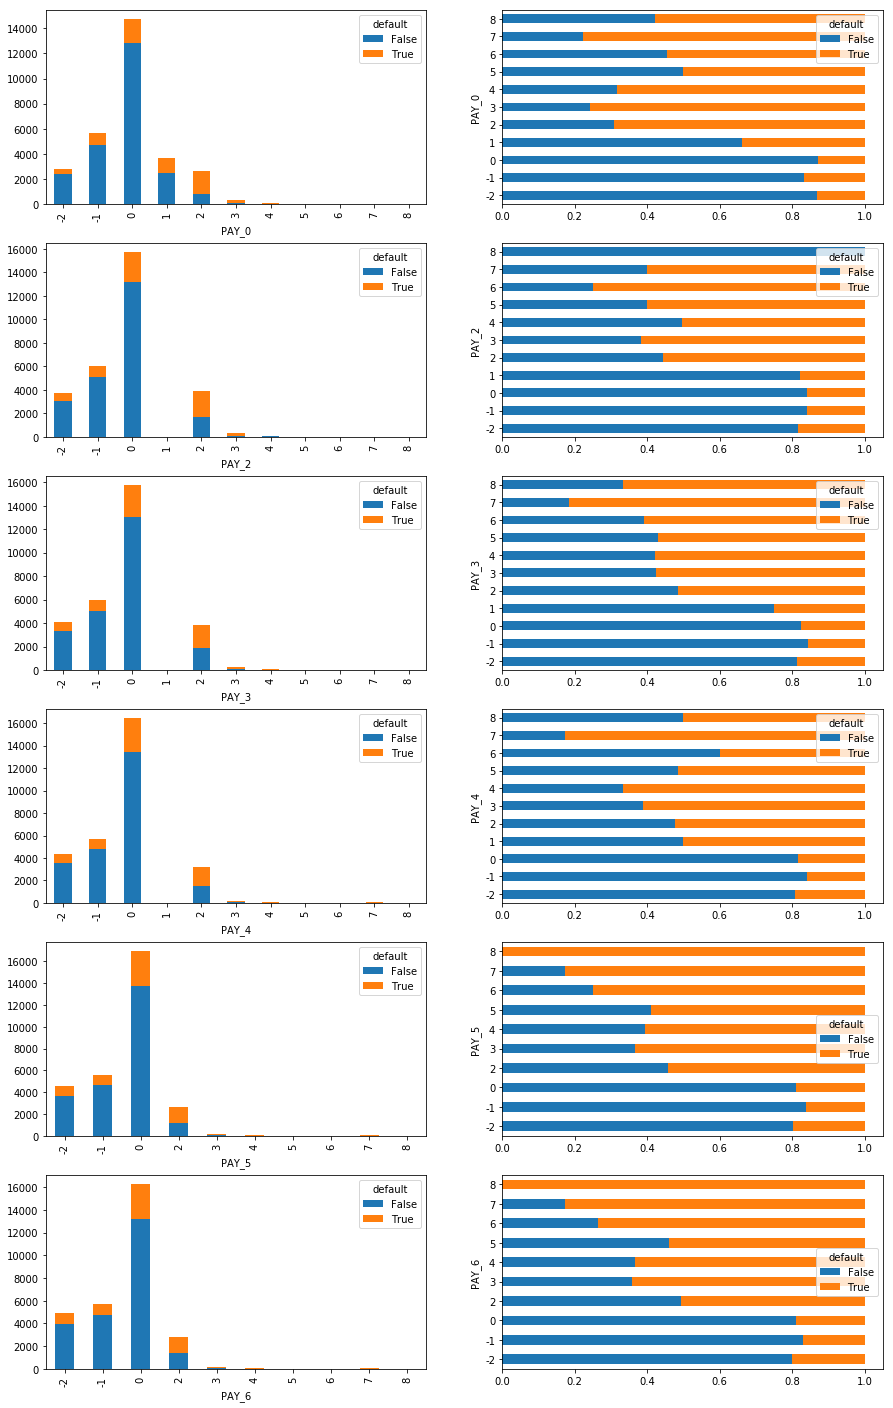

In [40]:
plotVar = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

fig, axes = plt.subplots(nrows=len(plotVar), ncols=2, figsize=(15, 25))

for fi,feature in enumerate(plotVar):
    Counts = pd.crosstab(df[feature],df.default.astype(bool))
    Counts.plot(kind='bar', stacked=True, ax=axes[fi,0])
    
    Rate = Counts.div(Counts.sum(1).astype(float),axis=0)
    Rate.plot(kind='barh', stacked=True, ax=axes[fi,1])
    
plt.show()

When we review the payment status it is pretty apparent that a history a late payments is potentially a pretty strong indication that person will default on there next payment. Based on the people that paid 2 or more months late in April of 2005, ~60% went on to default on there next payment. Logically this makes sense, as  person who is behind on payments seems less likely to be able to catch up in the following months. The current categorization method for tracking this is fairly coarse and could potentially be improved on. We will consider potential ways to utilize these features in our new features section below.

In order to better understand this behavior we will look at the prior bill and payment history from April 2005 to better understand the relationships between prior payments and the subsequent default result.

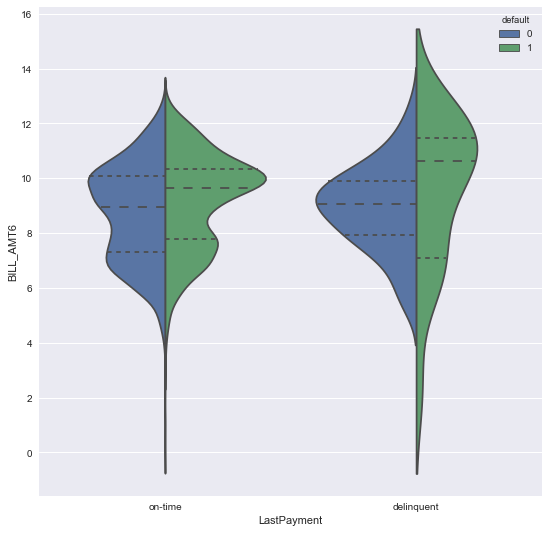

In [105]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="LastPayment", y="BILL_AMT6", hue="default", data=df, 
               split=True, inner="quart")

The above plot shows the distributions of the log transformed bill amounts from the April bill against the different payment results (on-time vs delinquent) for both the defaulted & not defaulted records for the next month.

Interestingly it does not appear that the actual bill amount has much effect on whether the customer was able to make payment on time for their April bill. However, perhaps there is a difference in the payment amounts.


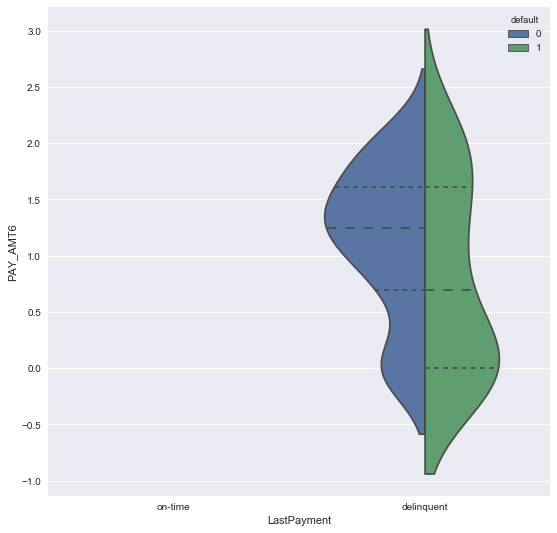

### New Features

_Are there other features that could be added to the data or created from existing features? Which ones?_
